In [1]:
# Importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud

In [2]:
# Reading the data from CSV File
df = pd.read_csv('all_upwork_jobs_2024-02-07-2024-03-24.csv') 


In [3]:
# Initial data exploration
print(df.head())  # Display the first few rows

                                               title  \
0  Experienced Media Buyer For Solar Pannel and R...   
1                               Full Stack Developer   
2                                    SMMA Bubble App   
3             Talent Hunter Specialized in Marketing   
4                                      Data Engineer   

                                                link  \
0  https://www.upwork.com/jobs/Experienced-Media-...   
1  https://www.upwork.com/jobs/Full-Stack-Develop...   
2  https://www.upwork.com/jobs/SMMA-Bubble-App_%7...   
3  https://www.upwork.com/jobs/Talent-Hunter-Spec...   
4  https://www.upwork.com/jobs/Data-Engineer_%7E0...   

              published_date  is_hourly  hourly_low  hourly_high  budget  \
0  2024-02-17 09:09:54+00:00      False         NaN          NaN   500.0   
1  2024-02-17 09:09:17+00:00      False         NaN          NaN  1100.0   
2  2024-02-17 09:08:46+00:00       True        10.0         30.0     NaN   
3  2024-02-17 09:08:08

In [4]:
print(df.shape)  # Shape of the dataset


(244828, 8)


In [5]:
print(df.info())  # Info about the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB
None


In [7]:
print(df.columns)

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country'],
      dtype='object')


In [8]:
# Handling missing values
print(df.isnull().sum())  # Checking for missing values

title                  1
link                   1
published_date         0
is_hourly              0
hourly_low        142406
hourly_high       146053
budget            140937
country             5077
dtype: int64


In [9]:
df.dropna(subset=['title', 'link'], inplace=True)  # Droping rows with missing 'title' or 'link'


In [10]:
df['hourly_low'].fillna(df['hourly_low'].median(), inplace=True)  # Fill missing values with median


In [11]:
df['hourly_high'].fillna(df['hourly_high'].median(), inplace=True)


In [12]:
df['budget'].fillna(df['budget'].median(), inplace=True)

In [13]:
df['country'].fillna('Unknown', inplace=True)

In [15]:
# Additional data description
print(df.describe())  # Statistical summary


          hourly_low    hourly_high          budget
count  244827.000000  244827.000000   244827.000000
mean       15.978777      34.829520      444.344374
std        11.789505      30.955791    10254.442214
min         3.000000       3.000000        5.000000
25%        15.000000      30.000000      100.000000
50%        15.000000      30.000000      100.000000
75%        15.000000      30.000000      100.000000
max       998.000000     999.000000  1000000.000000


In [16]:
print(df['country'].value_counts())  # Frequency counts for 'country'


United States               99834
United Kingdom              19149
India                       15835
Australia                   12618
Canada                      11658
                            ...  
Central African Republic        1
Aland Islands                   1
Saint Helena                    1
Vanuatu                         1
French Guiana                   1
Name: country, Length: 213, dtype: int64


In [17]:
# Setting aesthetic style for plots
sns.set(style="whitegrid")

/var/folders/5g/rs8mqb4j6yld7m4zqcwx54_40000gn/T/ipykernel_75781/3790380191.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['published_date'].dt.to_period('M')


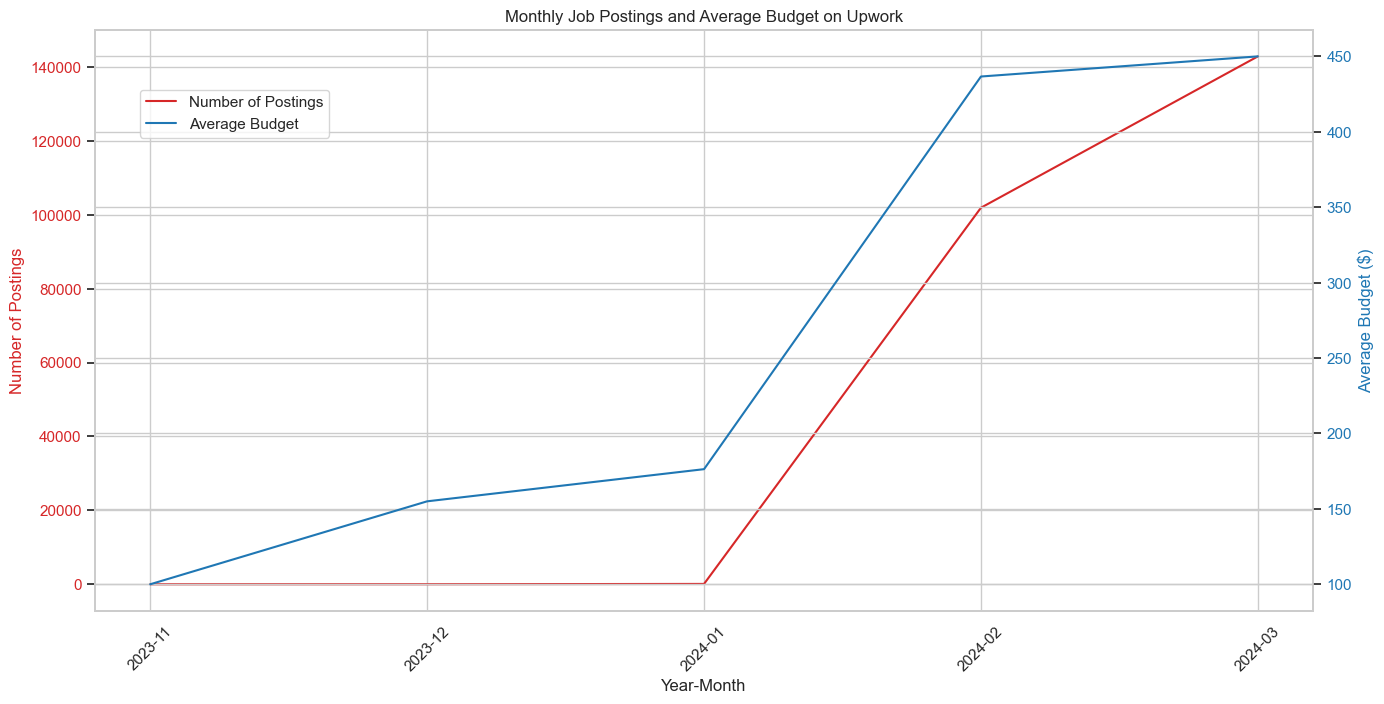

In [21]:
# Time-series analysis of job postings and average budget

df['published_date'] = pd.to_datetime(df['published_date']) ## Convert 'published_date' to datetime and extract year-month
df['year_month'] = df['published_date'].dt.to_period('M')

# Aggregate data: Count job postings and calculate average budget per month
monthly_data = df.groupby('year_month').agg(
    num_postings=pd.NamedAgg(column='title', aggfunc='size'),
    avg_budget=pd.NamedAgg(column='budget', aggfunc='mean')
)

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Number of Postings', color=color)
ax1.plot(monthly_data.index.astype(str), monthly_data['num_postings'], color=color, label='Number of Postings')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Instantiate a second y-axis to plot average budget
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Average Budget ($)', color=color)
ax2.plot(monthly_data.index.astype(str), monthly_data['avg_budget'], color=color, label='Average Budget')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
fig.tight_layout()  
plt.title('Monthly Job Postings and Average Budget on Upwork')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.show()


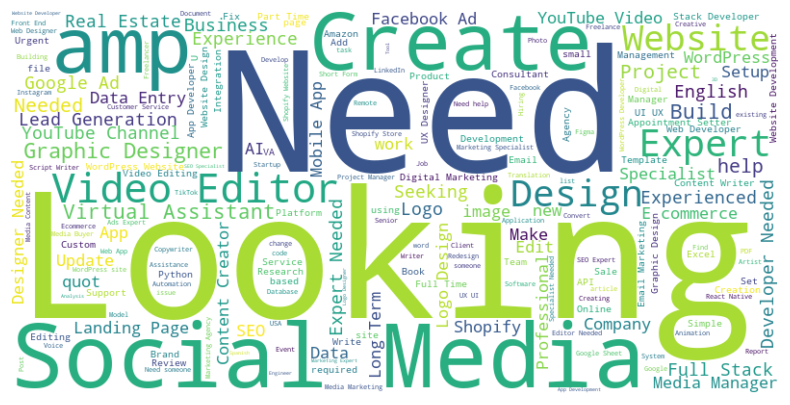

In [22]:
# Word cloud of job titles
titles_text = ' '.join(title for title in df['title'])  # Combine all job titles into a single string
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(titles_text)  # Generate word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

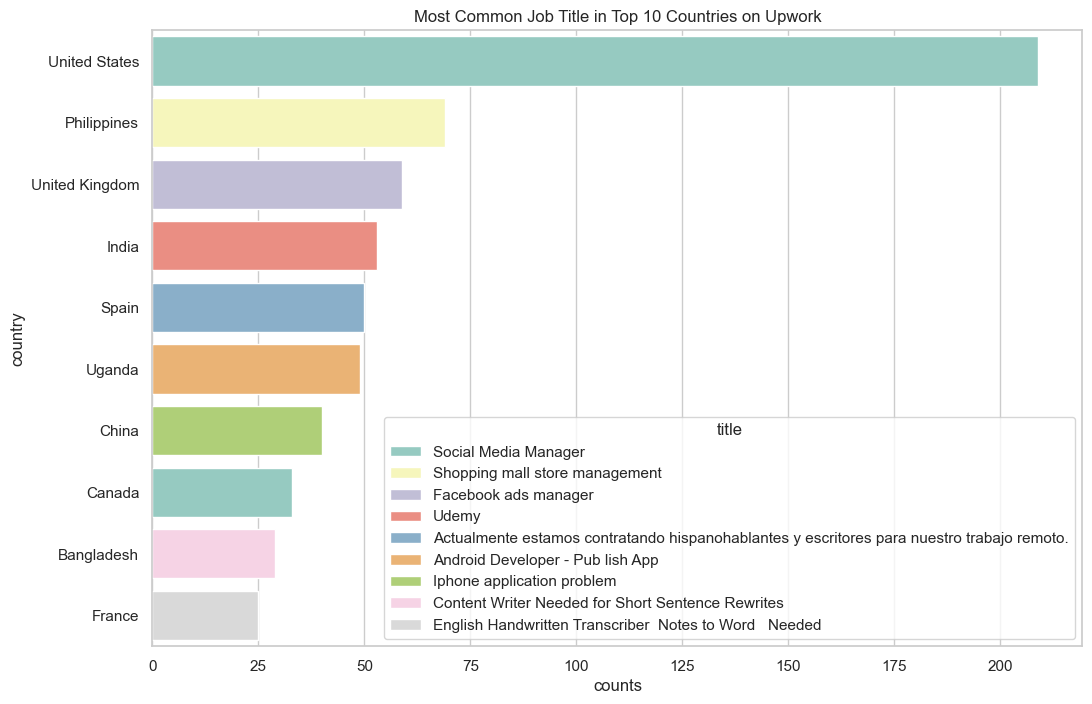

In [23]:
# Most common job titles by country
country_title_counts = df.groupby(['country', 'title']).size().reset_index(name='counts')
max_titles_by_country = country_title_counts.loc[country_title_counts.groupby('country')['counts'].idxmax()]
max_titles_by_country_sorted = max_titles_by_country.sort_values(by='counts', ascending=False)
top_max_titles_by_country = max_titles_by_country_sorted.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_max_titles_by_country, x='counts', y='country', hue='title', dodge=False, palette='Set3')
plt.title('Most Common Job Title in Top 10 Countries on Upwork')
plt.show()

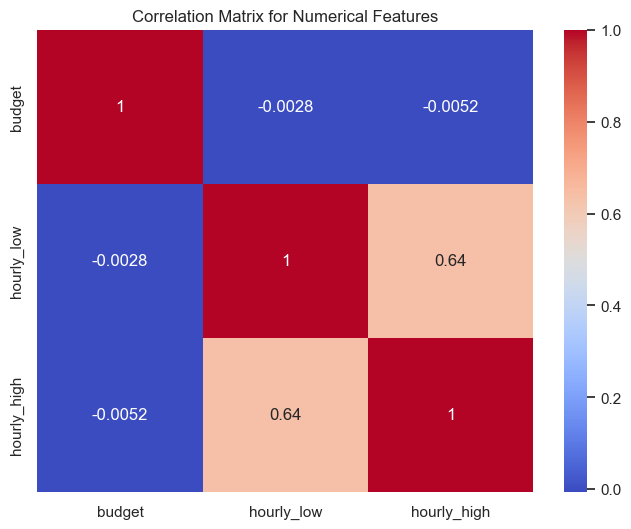

In [24]:
# Correlation matrix of numerical features Budget, Hourly Low and Hourly High
numerical_features = df[['budget', 'hourly_low', 'hourly_high']]
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

In [25]:
# Analysis of project types (Hourly or Fixed Pay)
df['is_hourly'] = df['is_hourly'].astype(bool)  # Ensure 'is_hourly' is boolean
df['project_type'] = df['is_hourly'].map({True: 'Hourly', False: 'Fixed-price'})
frequency_table = df['project_type'].value_counts().reset_index()
frequency_table.columns = ['Project Type', 'Frequency']
print(frequency_table)

  Project Type  Frequency
0       Hourly     140936
1  Fixed-price     103891


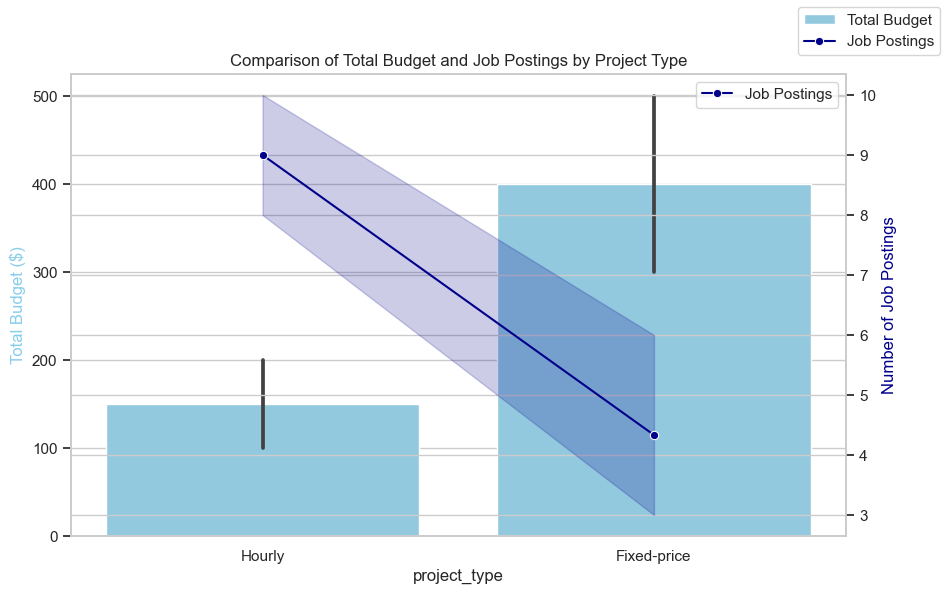

In [29]:
# Visual comparison of total budget and number of job postings by project type

df = pd.DataFrame({
    'is_hourly': [True, False, True, False, True, False],
    'total_budget': [100, 500, 150, 300, 200, 400],
    'job_postings': [10, 6, 9, 3, 8, 4]
})

# Map 'is_hourly' to 'project_type'
df['project_type'] = df['is_hourly'].map({True: 'Hourly', False: 'Fixed-price'})

# Setup plotting
fig, ax1 = plt.subplots(figsize=(10, 6))
barplot = sns.barplot(x='project_type', y='total_budget', data=df, color='skyblue', label='Total Budget', ax=ax1)
ax2 = ax1.twinx()
lineplot = sns.lineplot(x='project_type', y='job_postings', data=df, marker='o', color='darkblue', label='Job Postings', ax=ax2)

# Customize plot
ax1.set_ylabel('Total Budget ($)', color='skyblue')
ax2.set_ylabel('Number of Job Postings', color='darkblue')
plt.title('Comparison of Total Budget and Job Postings by Project Type')

# Display legend
ax1.figure.legend()

plt.show()


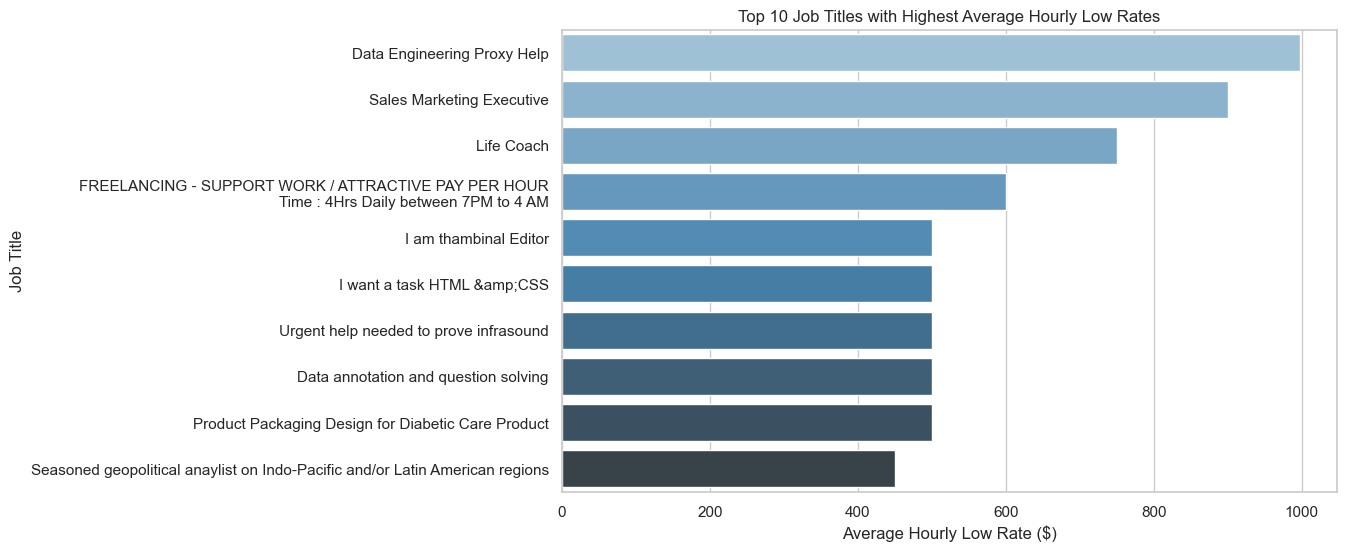

/Users/mahimaadvilkar/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127909 (\N{MOVIE CAMERA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


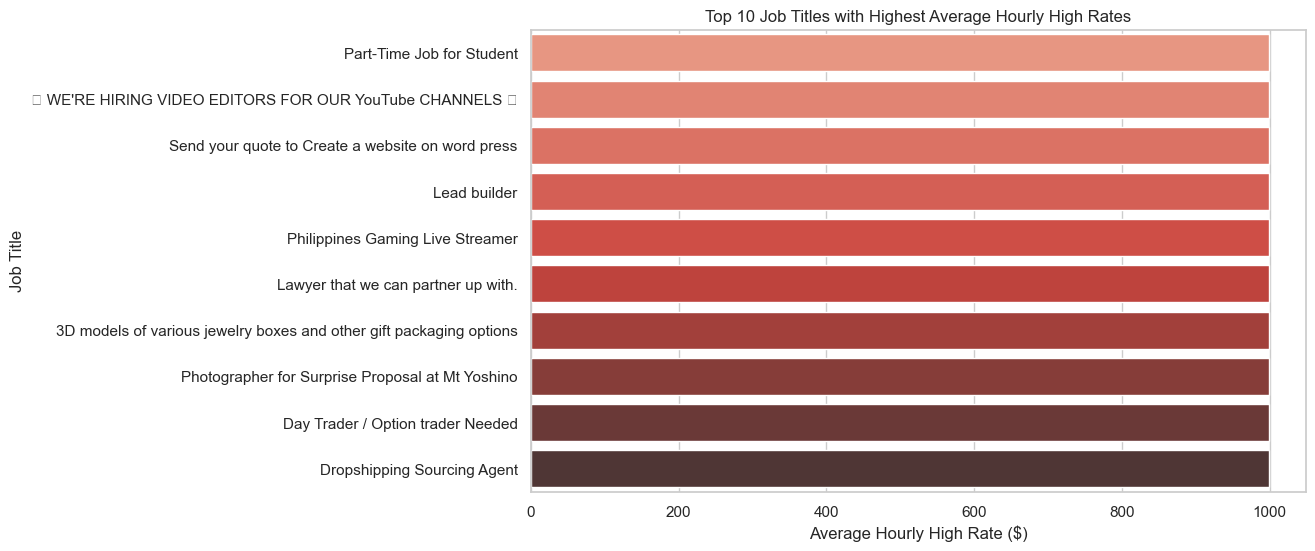

In [43]:
# Calculate the mean hourly_low rate for each job title and get the top 10
top_titles_hourly_low = df.groupby('title')['hourly_low'].mean().sort_values(ascending=False).head(10)

# Plot for hourly_low
plt.figure(figsize=(10, 6))
sns.barplot(x=top_titles_hourly_low.values, y=top_titles_hourly_low.index, palette="Blues_d")
plt.title('Top 10 Job Titles with Highest Average Hourly Low Rates')
plt.xlabel('Average Hourly Low Rate ($)')
plt.ylabel('Job Title')
plt.show()

# Calculate the mean hourly_high rate for each job title and get the top 10
top_titles_hourly_high = df.groupby('title')['hourly_high'].mean().sort_values(ascending=False).head(10)

# Plot for hourly_high
plt.figure(figsize=(10, 6))
sns.barplot(x=top_titles_hourly_high.values, y=top_titles_hourly_high.index, palette="Reds_d")
plt.title('Top 10 Job Titles with Highest Average Hourly High Rates')
plt.xlabel('Average Hourly High Rate ($)')
plt.ylabel('Job Title')
plt.show()
